In [1]:
import os
import glob
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.pyplot as plt

## Cargar datos

In [2]:
# Descargar carpeta comprimida
file_id = "1rJlPcKCN-Sl3bL_9xoSO94NiLyyrML__"
zip_path = "data-classification.zip"
!wget -O {zip_path} "https://drive.google.com/uc?export=download&id={file_id}"

# Crear carpeta data
os.makedirs("data", exist_ok=True)

# Instalar paquetes para descomprimir
!apt-get install unrar-free

# Extraer el archivo RAR al directorio correcto
!unrar x {zip_path} data


--2025-12-03 22:01:24--  https://drive.google.com/uc?export=download&id=1rJlPcKCN-Sl3bL_9xoSO94NiLyyrML__
Resolving drive.google.com (drive.google.com)... 142.250.99.100, 142.250.99.138, 142.250.99.139, ...
Connecting to drive.google.com (drive.google.com)|142.250.99.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1rJlPcKCN-Sl3bL_9xoSO94NiLyyrML__&export=download [following]
--2025-12-03 22:01:24--  https://drive.usercontent.google.com/download?id=1rJlPcKCN-Sl3bL_9xoSO94NiLyyrML__&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.195.132, 2607:f8b0:400e:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.195.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2428020 (2.3M) [application/octet-stream]
Saving to: ‘data-classification.zip’

data-classification 100%[===================>]   2.32M 

## Redimensionar y Dividir Train/Val

In [3]:
import tensorflow as tf

img_size = (224, 224)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "data",
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "data",
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)

train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds   = val_ds.prefetch(tf.data.AUTOTUNE)

Found 391 files belonging to 2 classes.
Using 313 files for training.
Found 391 files belonging to 2 classes.
Using 78 files for validation.


## Data Augmentation

In [4]:
data_augmentation1 = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.05)
])
data_augmentation2 = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.2)
])
data_augmentation3 = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.3),
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.RandomBrightness(0.2)
])
data_augmentation4 = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.35),
    tf.keras.layers.RandomZoom(0.4),
    tf.keras.layers.RandomContrast(0.3),
    tf.keras.layers.RandomBrightness(0.3),

    tf.keras.layers.RandomTranslation(0.2, 0.2),
    tf.keras.layers.RandomShear(0.25),

    tf.keras.layers.RandomCrop(200, 200),
    tf.keras.layers.Resizing(224, 224),

    # --- Ruido Gaussiano custom ---
    tf.keras.layers.Lambda(lambda x: x + tf.random.normal(shape=tf.shape(x), mean=0.0, stddev=8.0))
])


In [6]:
import matplotlib.pyplot as plt

# Tomar un batch del dataset
images, labels = next(iter(train_ds))

# Funcion para mostrar
def show_images(img_batch, title=""):
    plt.figure(figsize=(12, 8))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(img_batch[i].numpy().astype("uint8"))
        plt.axis("off")
    plt.suptitle(title, fontsize=16)
    plt.show()




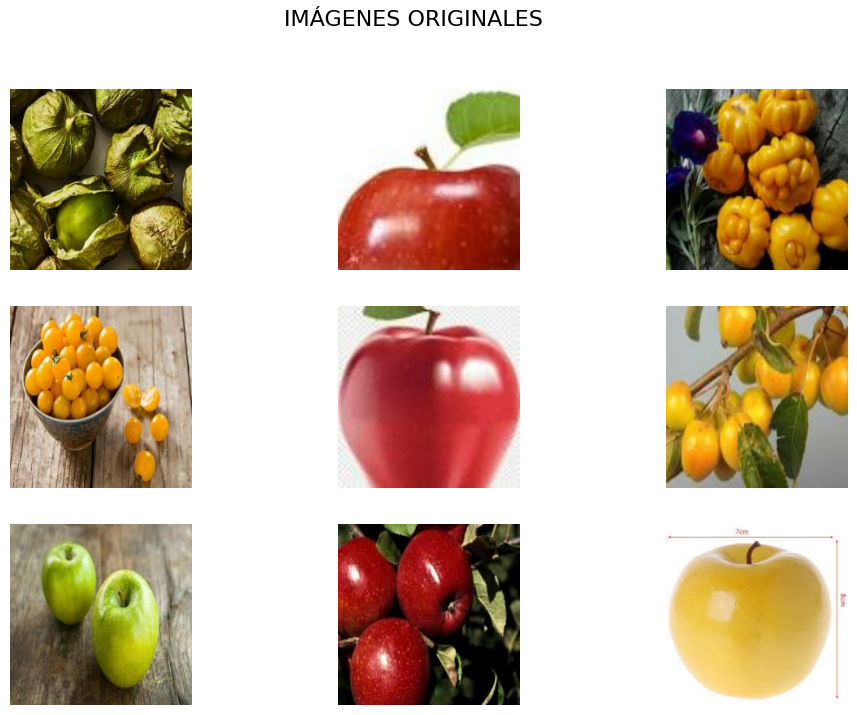

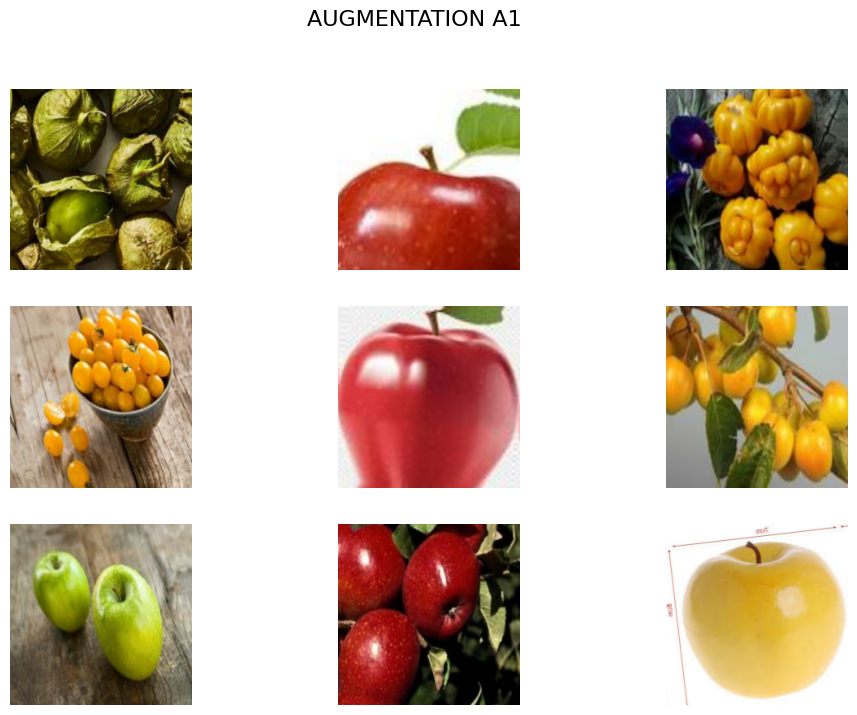

In [7]:
augmented_images = data_augmentation1(images)
show_images(images, "IMÁGENES ORIGINALES")
aug1 = data_augmentation1(images)
show_images(aug1, "AUGMENTATION A1")


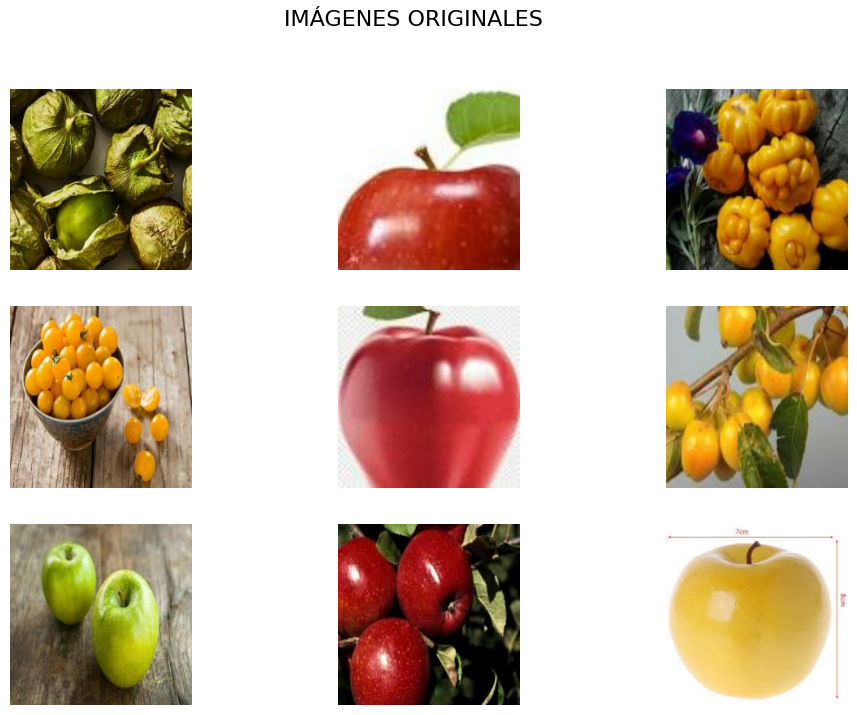

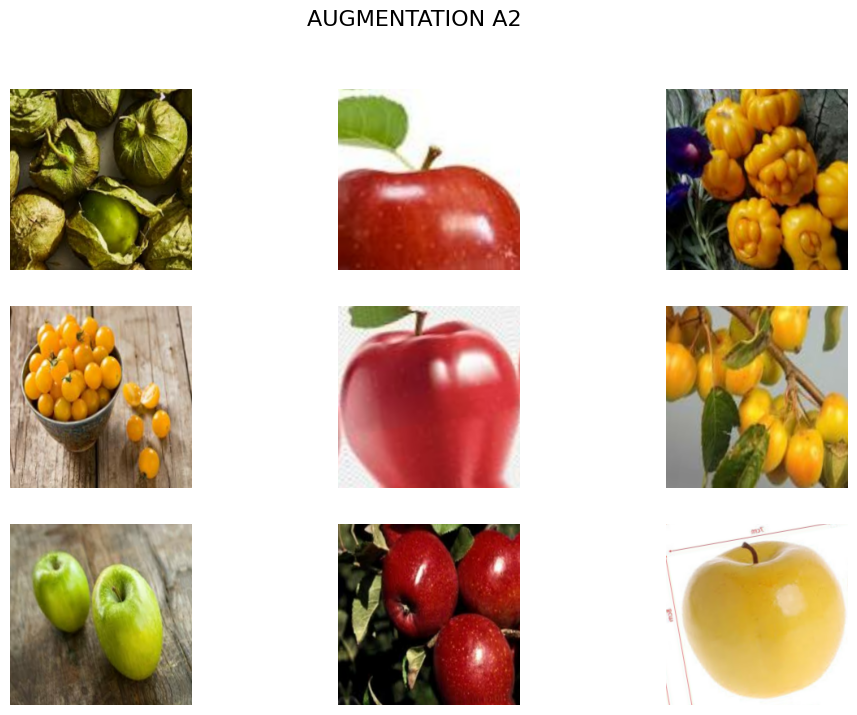

In [8]:
augmented_images = data_augmentation2(images)
show_images(images, "IMÁGENES ORIGINALES")
aug2 = data_augmentation1(images)
show_images(aug2, "AUGMENTATION A2")


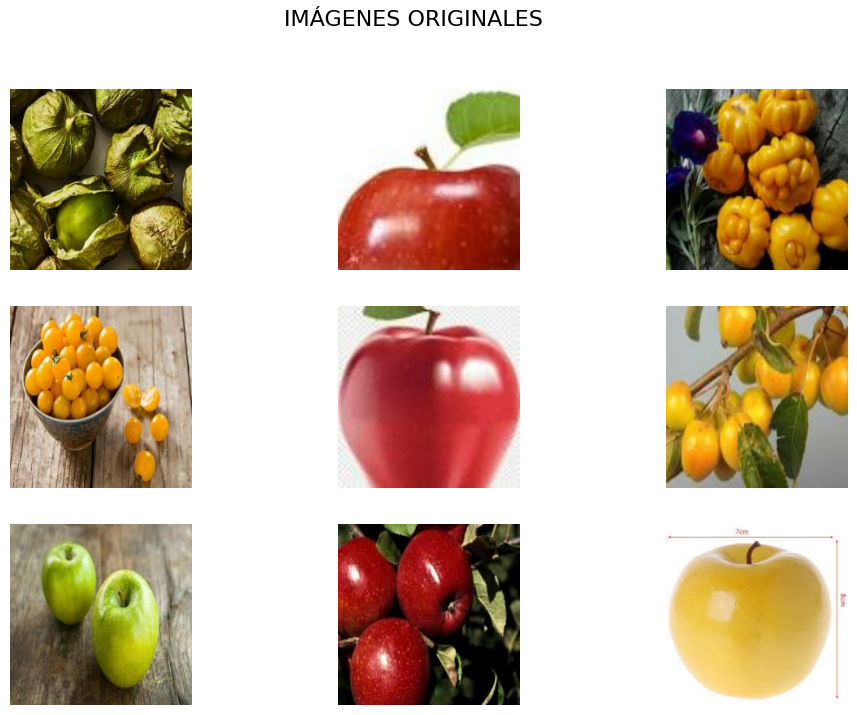

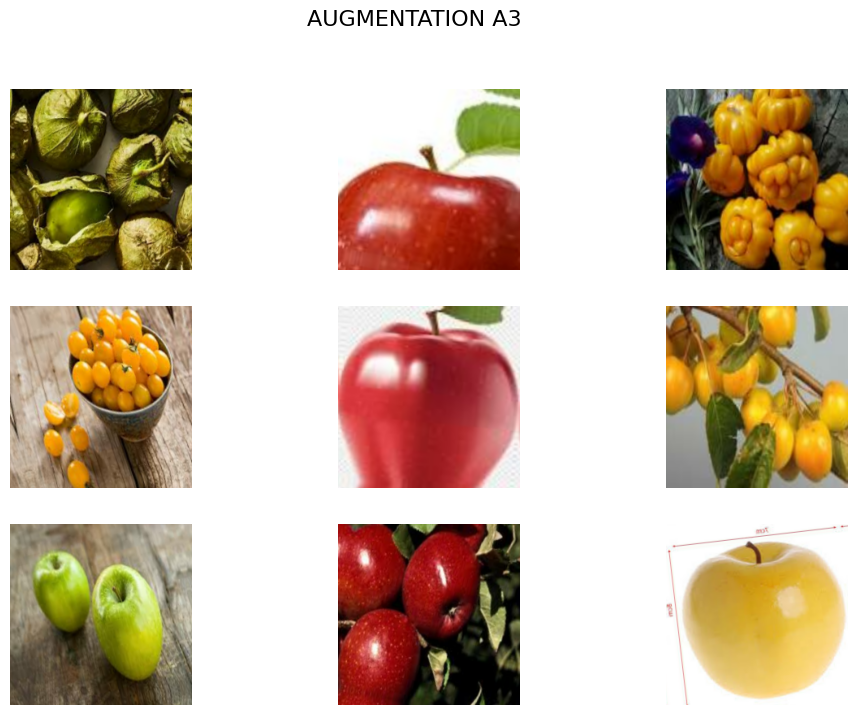

In [9]:
augmented_images = data_augmentation3(images)
show_images(images, "IMÁGENES ORIGINALES")
aug3 = data_augmentation3(images)
show_images(aug1, "AUGMENTATION A3")


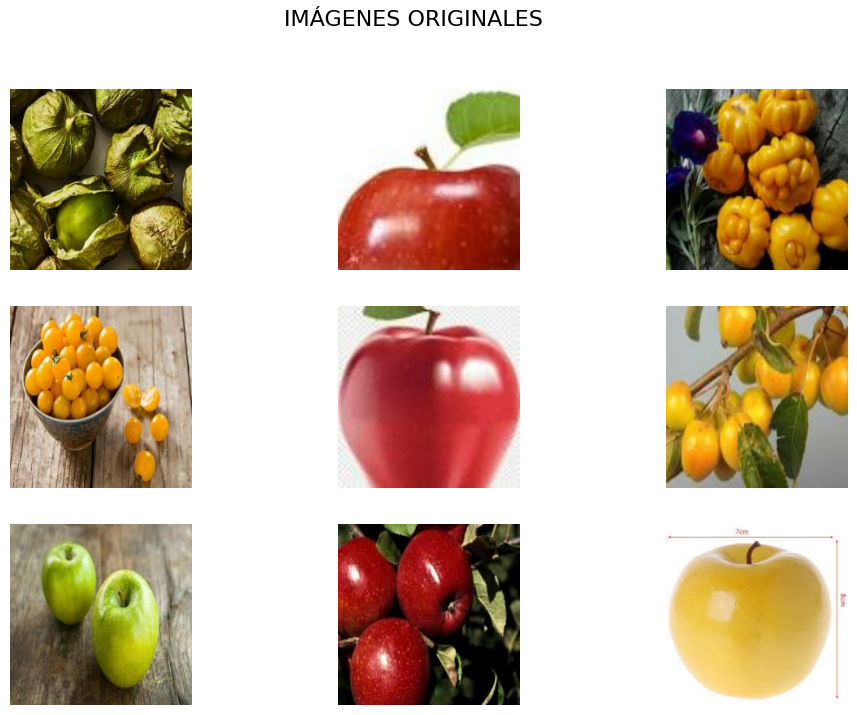

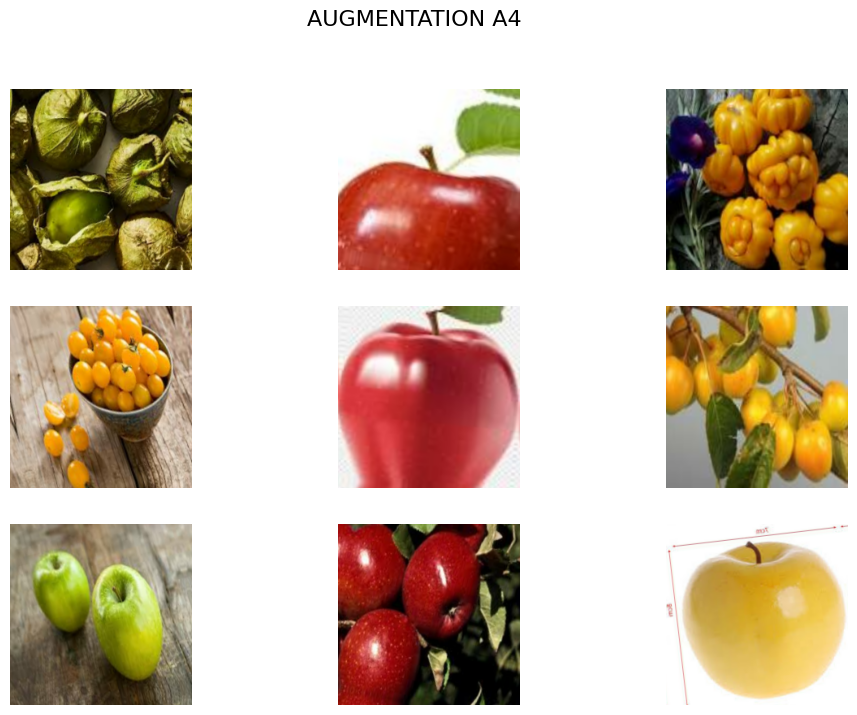

In [10]:
augmented_images = data_augmentation4(images)
show_images(images, "IMÁGENES ORIGINALES")
aug4 = data_augmentation3(images)
show_images(aug1, "AUGMENTATION A4")